In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import preprocessor
import helper

In [ ]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

df = preprocessor.preprocess(df, region_df)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [ ]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
df.info()

Rows: 221167
Columns: 20
<class 'pandas.core.frame.DataFrame'>
Index: 221167 entries, 0 to 222551
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     212137 non-null  float64
 4   Height  170667 non-null  float64
 5   Weight  168661 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   34077 non-null   object 
 15  region  220797 non-null  object 
 16  notes   4397 non-null    object 
 17  Bronze  221167 non-null  bool   
 18  Gold    221167 non-null  bool   
 19  Silver  221167 non-null  bool   
dtypes: bool(3), float64(3), int6

In [ ]:
years, countries = helper.country_year_list(df)

years[:10], countries[:10]

(['Overall', 1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928],
 ['Overall',
  'Afghanistan',
  'Albania',
  'Algeria',
  'American Samoa',
  'Andorra',
  'Angola',
  'Antigua',
  'Argentina',
  'Armenia'])

In [ ]:
selected_year = 2012
selected_country = "India"

medal_tally = helper.fetch_medal_tally(df, selected_year, selected_country)
medal_tally

,region,Gold,Silver,Bronze,total
0,India,0,2,4,6


In [ ]:
editions = df['Year'].nunique() - 1
cities = df['City'].nunique()
sports = df['Sport'].nunique()
events = df['Event'].nunique()
athletes = df['Name'].nunique()
nations = df['region'].nunique()

print(editions, cities, sports, events, athletes, nations)

28 23 52 651 116122 205


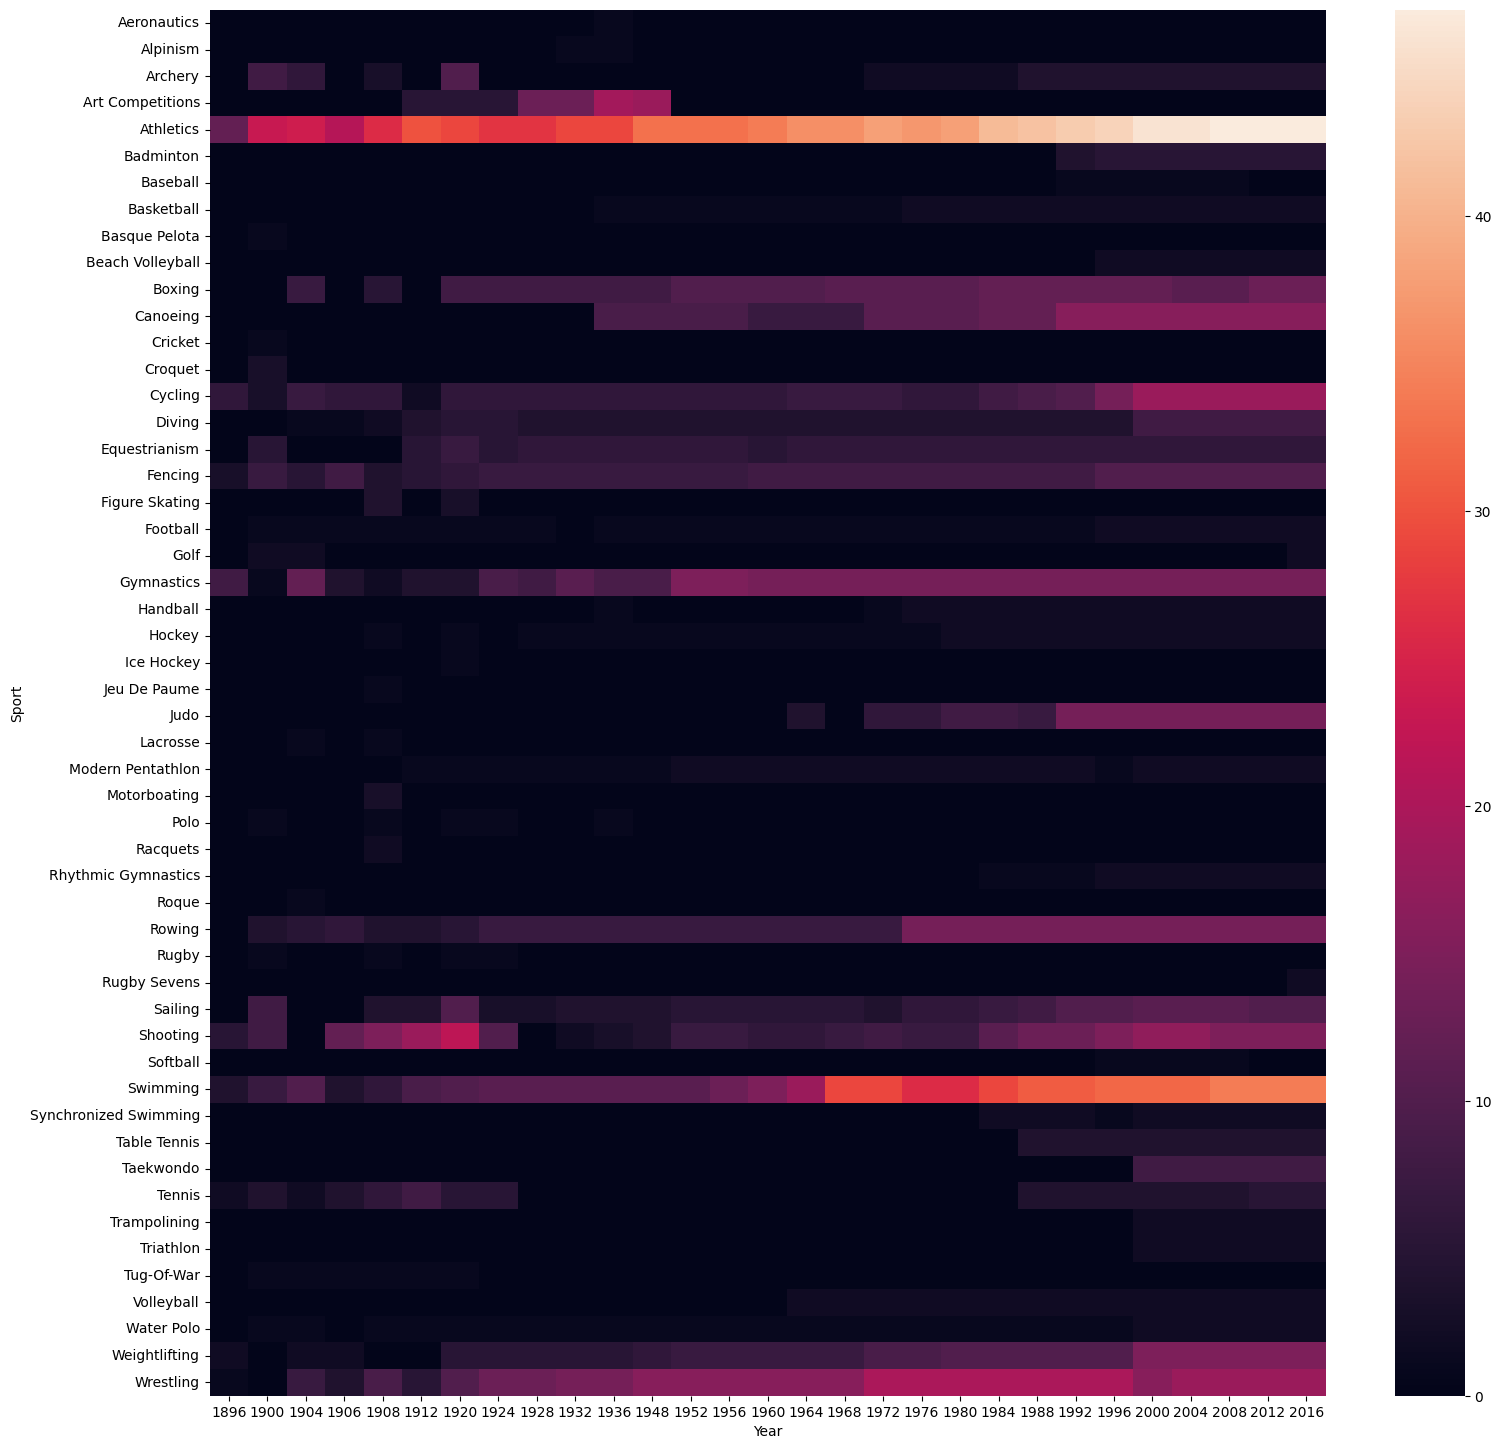

In [ ]:
x = df.drop_duplicates(['Year', 'Sport', 'Event'])

plt.figure(figsize=(18,18))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0))
plt.show()

In [ ]:
country = "India"

country_df = helper.yearwise_medal_tally(df,country)
px.line(country_df, x="Year", y="Medal", title=f"{country} Medal Tally")

/content/helper.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp = df.drop_duplicates(['Year', col])


/content/helper.py:73: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



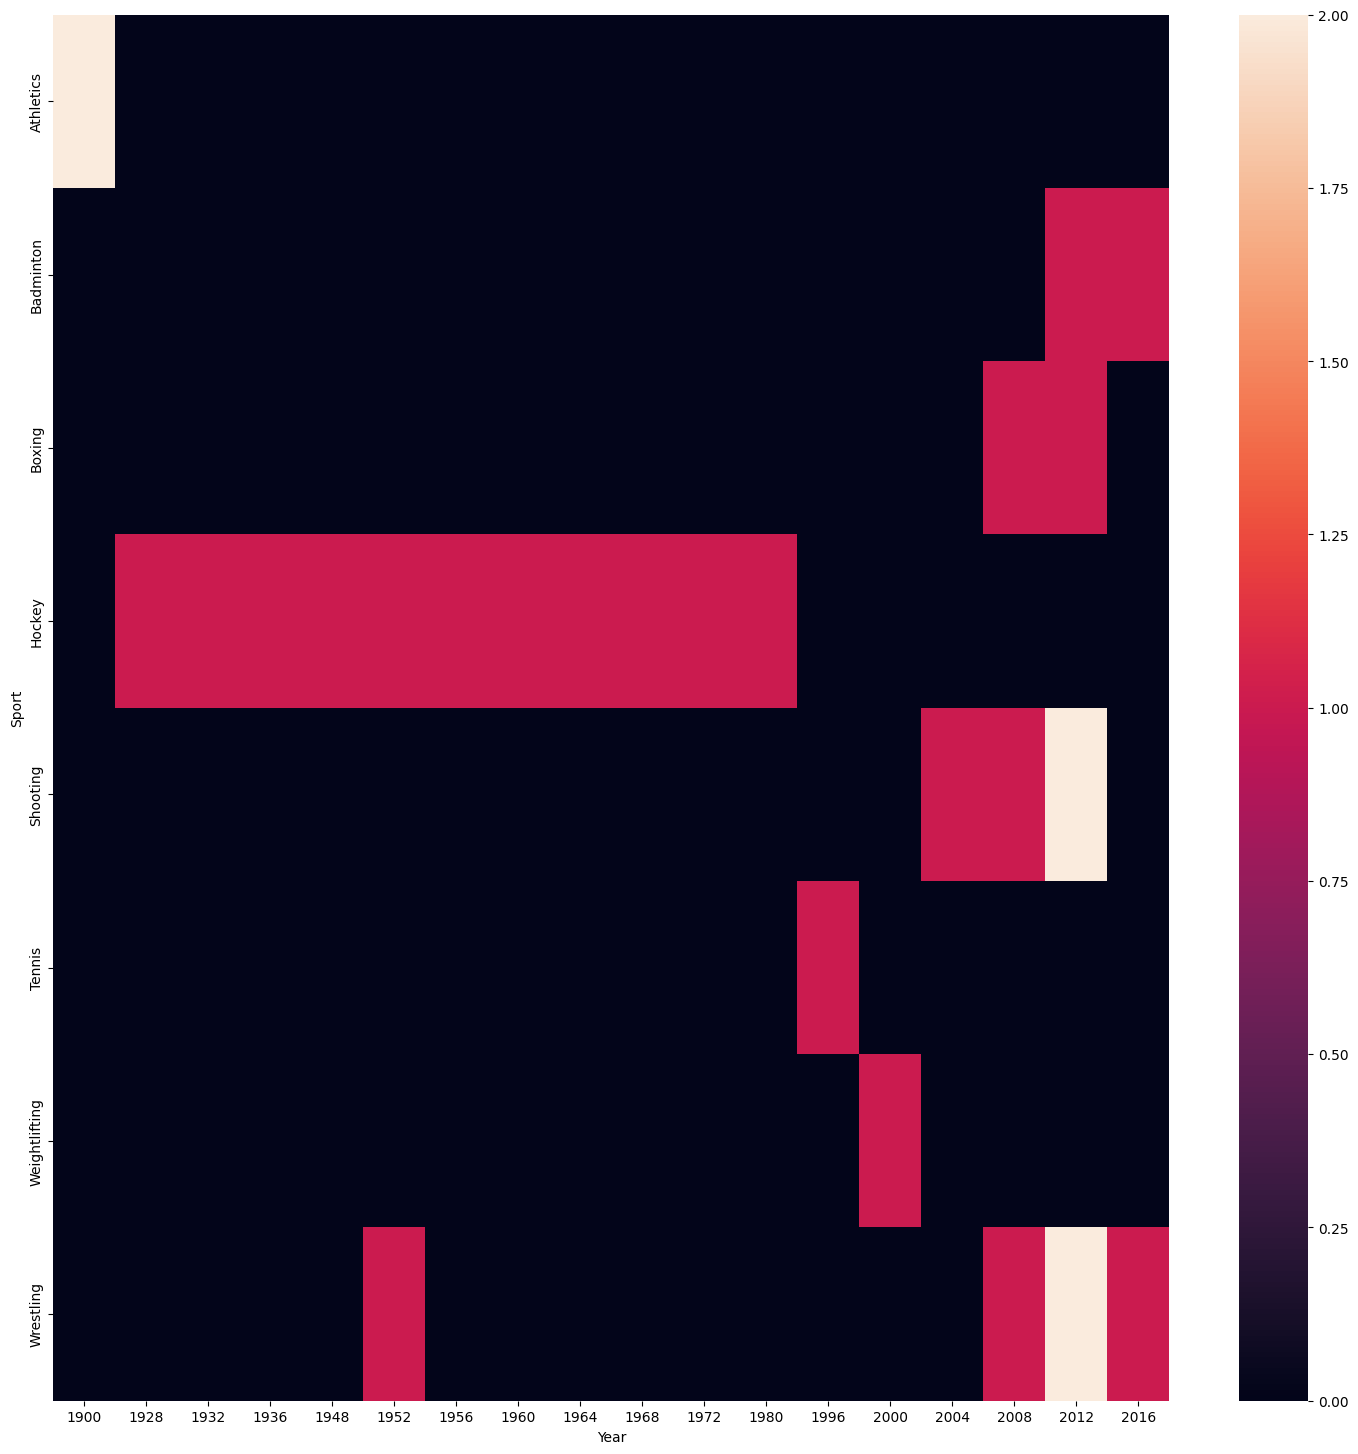

In [ ]:
pt = helper.country_event_heatmap(df,country)

plt.figure(figsize=(18,18))
sns.heatmap(pt,annot=False)
plt.show()

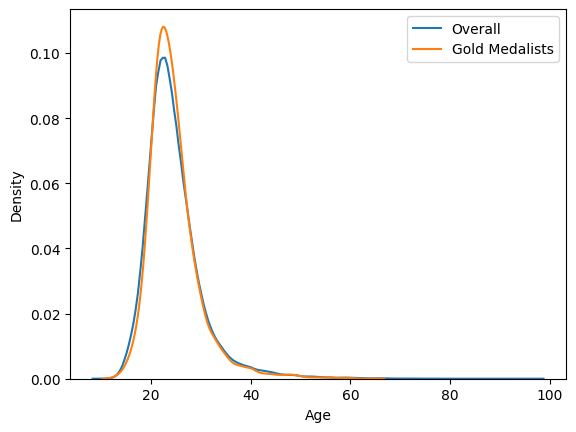

In [ ]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()

sns.kdeplot(x1,label="Overall")
sns.kdeplot(x2,label="Gold Medalists")
plt.legend()
plt.show()

/content/helper.py:93: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/content/helper.py:93: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



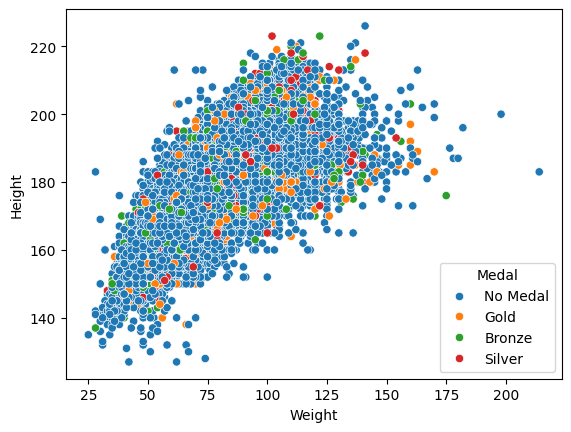

In [ ]:
temp_df = helper.weight_v_height(df,'Overall')

sns.scatterplot(data=temp_df, x="Weight", y="Height", hue="Medal")
plt.show()

In [ ]:
final = helper.men_vs_women(df)

px.line(final, x="Year", y=["Male","Female"])